#### Flight Price prediction

#### Problem Statement

- We will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

- FEATURES: Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket # Model this price based on training data available to us !! 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_excel('Data_Train.xlsx') #100%   80%( training sample) - 20% (validation) # DS : 
test_data=pd.read_excel('Test_set.xlsx') #  ( unseen data !! )  ---- Sales team , give me the price predictions. # 

In [ ]:
# training data : ( 100 tables ) : i final table - 90% 
# internaly 70% - 30% - Model you created it !!  you can develop the model on complete 95% - 5%(validation ) - Model which is read

# sales team : paralely : give you one : file : 

In [ ]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [ ]:
train_data.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


#### Explroation Phase - Exploratory Data Analysis 
 - Data types validation : 
 - Data duplicated  : Treat 
 - Univariate and Bivariate Anaysis 
 - Missing values ? 
 - how to impute it ? 
     

In [ ]:
# Iteration 1 : 11-mar-2021 : 

    - EDA : 
        - Dropped dupliates
        - Outlier treatment - mean se replace : ( column !! )
    - Feature enginner : 
            - added new variable 
            

In [ ]:
# train_data[train_data.duplicated()]
# train_data.drop_duplicates

In [ ]:
train_data.drop_duplicates(keep='first',inplace=True) # duplicates removed 

In [ ]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
# What all Data clearning or EDA perform 
 - Duration : i need to convert this text to  minutes !! Priya :  create this column ( duration_)
 - Date of journey : I have to create Months , day ( i created Days , you can create Months and year !! )
 - Departure_hours : create new feature from dep_time to convert it into hours only , # Priya : Do it for Arrival Time !! 
 - Dep_minutes : i convert to minutes : Priya to validate !!
 - Arrival hour : get the hours from arrival time : You can do it !! Arrival !! Arrival hour and arrival min 
 - arrival minutes 
 - Total_stops : fill the 1 sample which is blank with the 
 - Remove the null value from the data having stops !! ( missing 1 sample for stops ) : Priya to resolve.
 - Total_stops : we created numerical  maapings from the strings data !! ( Onehot encoding , labelencoding !! )
        - total stops and prices how they are varying .. scatterplot !! 
             - results !! 

In [ ]:
# logic : is here : 
# int(train_data['Duration'][0].split(' ')[0].split('h')[0])*60+int(train_data['Duration'][0].split(' ')[1].split('m')[0])

In [ ]:
# train_data['Duration'][123]

'20h 15m'

In [ ]:
# int(train_data['Duration'][123].split(' ')[1].split('m')[0])

15

In [ ]:
'24/03/2019'.split('/')[2]

'2019'

In [ ]:
# Date of journey feture creation : 

In [ ]:
train_data['journey_day']=train_data['Date_of_Journey'].str.split('/').str[0].astype('int')

In [ ]:
# Deaprture hours : 

In [ ]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Dep_hour,Dep_min,Total_Stops_1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,22,20,0.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,50,2.0


In [ ]:
train_data['Dep_hour']=train_data['Dep_Time'].str.split(':').str[0].astype('int')

In [ ]:
train_data['Dep_min']=train_data['Dep_Time'].str.split(':').str[1].astype('int')

In [ ]:
train_data['Total_Stops'].unique().tolist()

['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']

In [ ]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train_data['Total_Stops_1']=train_data['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4])

In [ ]:
train_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
journey_day          int32
Dep_hour             int32
Dep_min              int32
Total_Stops_1      float64
dtype: object

In [ ]:
((train_data['Airline'].unique().tolist()))

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

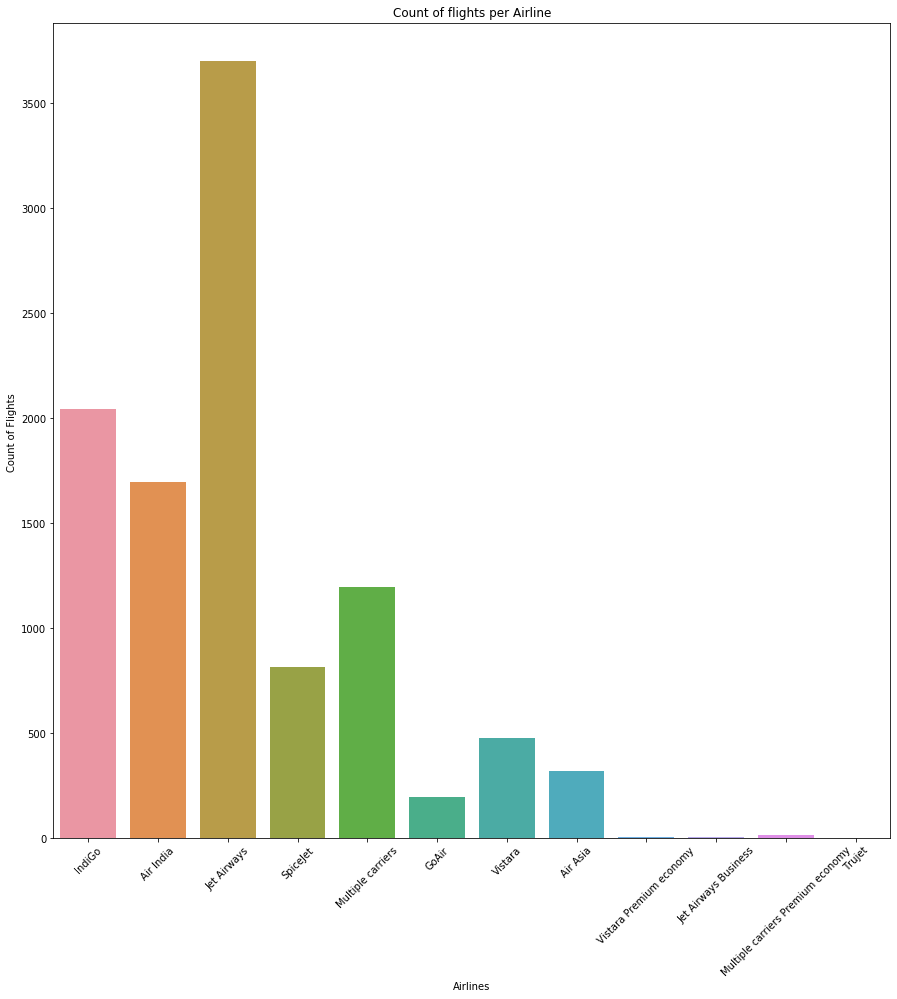

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Count of flights per Airline")
ax=sns.countplot(x='Airline',data=train_data)
plt.xlabel("Airlines")
plt.ylabel("Count of Flights ")
plt.xticks(rotation=45)

-  Club the flights 4 lowest frequency and mark them other 
-  Mark the addition_info categories with lower counts to others !! 
-  Categorical features , new columns !! 

In [ ]:
train_data['Additional_Info'].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [ ]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Dep_hour,Dep_min,Total_Stops_1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,22,20,0.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,50,2.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d1=(train_data.loc[:,['Airline','Source','Destination']]).apply(le.fit_transform)
d1

,Airline,Source,Destination
0,3,0,5
1,1,3,0
2,4,2,1
3,3,3,0
4,3,0,5
...,...,...,...
10678,0,3,0
10679,1,3,0
10680,4,0,2
10681,10,0,5
